# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# API key obtained by creating an account on OpenWeather
api_key = '1b50c98d0f8ff4bbfddbffae17bc9850'

# Today's date
date_today = date.today()

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q="

# lists to store results
latitudes = []
temperatures = []
humidities = []
cloudiness = []
wind_speeds = []
city_names = []

i = 0 # counter for successfully processed cities

for city in cities:
    try:
        response_json = requests.get(query_url + city).json()
        latitude = response_json['coord']['lat']
        temp = response_json['main']['temp_max']
        humidity = response_json['main']['humidity']
        cloud = response_json['clouds']['all']
        wind = response_json['wind']['speed']
        city_name = response_json['name']
        city_id = response_json['id']
        
        latitudes.append(latitude)
        temperatures.append(temp)
        humidities.append(humidity)
        cloudiness.append(cloud)
        wind_speeds.append(wind)
        city_names.append(city_name)
        
        print(f"Processing City {i}: Name: {city_name}, ID: {city_id}, Latitude: {latitude}, Temp: {temp}, Humidity: {humidity}, Cloudiness: {cloud}, Wind: {wind}")
        i += 1
    except:
        print(f"Error while processing city {city}. Skipping")
print (len(latitudes), len(temperatures), len(humidities), len(cloudiness), len(wind_speeds), len(city_names))

Processing City 0: Name: Olinda, ID: 2154386, Latitude: -37.84, Temp: 299.82, Humidity: 44, Cloudiness: 65, Wind: 9.3
Processing City 1: Name: Wajima, ID: 1848976, Latitude: 37.4, Temp: 279.24, Humidity: 81, Cloudiness: 100, Wind: 3
Processing City 2: Name: Hilo, ID: 5855927, Latitude: 19.71, Temp: 300.15, Humidity: 61, Cloudiness: 90, Wind: 5.1
Processing City 3: Name: Nemuro, ID: 2128975, Latitude: 43.32, Temp: 270.38, Humidity: 65, Cloudiness: 92, Wind: 7.26
Processing City 4: Name: Sampit, ID: 1628884, Latitude: -2.54, Temp: 297.41, Humidity: 95, Cloudiness: 100, Wind: 0.61
Processing City 5: Name: Hermanus, ID: 3366880, Latitude: -34.42, Temp: 293.15, Humidity: 86, Cloudiness: 74, Wind: 0.45
Processing City 6: Name: Balclutha, ID: 2208248, Latitude: -46.28, Temp: 284.82, Humidity: 65, Cloudiness: 67, Wind: 3.13
Processing City 7: Name: Clyde River, ID: 5924351, Latitude: 70.47, Temp: 242.15, Humidity: 74, Cloudiness: 40, Wind: 2.1
Processing City 8: Name: Faanui, ID: 4034551, Lati

Processing City 64: Name: Ainaro, ID: 1651810, Latitude: -8.93, Temp: 292.43, Humidity: 82, Cloudiness: 100, Wind: 1.27
Processing City 65: Name: Anan, ID: 1865309, Latitude: 33.93, Temp: 282.15, Humidity: 49, Cloudiness: 75, Wind: 6.7
Processing City 66: Name: Tasiilaq, ID: 3424607, Latitude: 65.61, Temp: 259.15, Humidity: 50, Cloudiness: 20, Wind: 2.6
Processing City 67: Name: Victoria, ID: 2562619, Latitude: 36.06, Temp: 284.26, Humidity: 66, Cloudiness: 20, Wind: 1.5
Processing City 68: Name: Rocha, ID: 3440777, Latitude: -34.48, Temp: 307.77, Humidity: 24, Cloudiness: 97, Wind: 3.97
Processing City 69: Name: Wrens, ID: 4231997, Latitude: 33.19, Temp: 291.48, Humidity: 31, Cloudiness: 1, Wind: 6.7
Processing City 70: Name: Ardesen, ID: 751949, Latitude: 41.19, Temp: 279.15, Humidity: 87, Cloudiness: 75, Wind: 1.5
Processing City 71: Name: Ixtapa, ID: 4004293, Latitude: 20.71, Temp: 299.82, Humidity: 61, Cloudiness: 20, Wind: 2.1
Processing City 72: Name: Georgetown, ID: 3378644, La

Processing City 131: Name: Urgut, ID: 1215839, Latitude: 39.41, Temp: 275.15, Humidity: 74, Cloudiness: 100, Wind: 2.1
Processing City 132: Name: Avarua, ID: 4035715, Latitude: -21.21, Temp: 299.15, Humidity: 83, Cloudiness: 97, Wind: 4.6
Processing City 133: Name: Eyl, ID: 60019, Latitude: 7.98, Temp: 299.02, Humidity: 76, Cloudiness: 6, Wind: 9.39
Processing City 134: Name: Klaksvik, ID: 2618795, Latitude: 62.23, Temp: 278.15, Humidity: 66, Cloudiness: 48, Wind: 6.2
Processing City 135: Name: Alta Floresta, ID: 6316343, Latitude: -9.87, Temp: 298.15, Humidity: 94, Cloudiness: 75, Wind: 4.1
Processing City 136: Name: Elmadag, ID: 315720, Latitude: 39.92, Temp: 273.15, Humidity: 68, Cloudiness: 40, Wind: 2.1
Processing City 137: Name: Dingle, ID: 1714733, Latitude: 11, Temp: 295.91, Humidity: 91, Cloudiness: 57, Wind: 4.95
Processing City 138: Name: Yellowknife, ID: 6185377, Latitude: 62.45, Temp: 234.15, Humidity: 65, Cloudiness: 20, Wind: 2.6
Processing City 139: Name: Port Augusta, 

Processing City 197: Name: Radeberg, ID: 2851079, Latitude: 51.12, Temp: 284.26, Humidity: 93, Cloudiness: 75, Wind: 1
Processing City 198: Name: Gawler, ID: 2071059, Latitude: -34.6, Temp: 298.15, Humidity: 64, Cloudiness: 65, Wind: 3.1
Processing City 199: Name: Province of Batangas, ID: 1726279, Latitude: 13.8, Temp: 297.04, Humidity: 92, Cloudiness: 84, Wind: 2.2
Processing City 200: Name: La Ronge, ID: 6050066, Latitude: 55.1, Temp: 253.15, Humidity: 70, Cloudiness: 90, Wind: 3.6
Processing City 201: Name: Grindavik, ID: 3416888, Latitude: 63.84, Temp: 270.15, Humidity: 92, Cloudiness: 75, Wind: 11.8
Error while processing city asau. Skipping
Processing City 202: Name: Quelimane, ID: 1028434, Latitude: -17.88, Temp: 303.15, Humidity: 79, Cloudiness: 20, Wind: 4.6
Processing City 203: Name: Metro, ID: 1635283, Latitude: -5.11, Temp: 297.62, Humidity: 92, Cloudiness: 100, Wind: 2.32
Processing City 204: Name: Zaraza, ID: 3625066, Latitude: 9.35, Temp: 305.39, Humidity: 41, Cloudines

Processing City 261: Name: Srednekolymsk, ID: 2121025, Latitude: 67.46, Temp: 238.57, Humidity: 90, Cloudiness: 0, Wind: 0.36
Processing City 262: Name: Bolitoc, ID: 1724301, Latitude: 15.74, Temp: 295.43, Humidity: 76, Cloudiness: 10, Wind: 1.48
Processing City 263: Name: Leksvik, ID: 7626384, Latitude: 63.83, Temp: 277.59, Humidity: 74, Cloudiness: 20, Wind: 5.7
Processing City 264: Name: Sungaipenuh, ID: 1625929, Latitude: -2.08, Temp: 290.54, Humidity: 98, Cloudiness: 100, Wind: 1.16
Processing City 265: Name: Casino, ID: 2172153, Latitude: -28.86, Temp: 295.15, Humidity: 88, Cloudiness: 18, Wind: 3.6
Processing City 266: Name: Comodoro Rivadavia, ID: 3860443, Latitude: -45.87, Temp: 290.15, Humidity: 25, Cloudiness: 75, Wind: 6.2
Processing City 267: Name: Cristobal Obregon, ID: 3530097, Latitude: 16.38, Temp: 296.15, Humidity: 60, Cloudiness: 40, Wind: 4.1
Processing City 268: Name: Vallenar, ID: 3868633, Latitude: -28.57, Temp: 299.68, Humidity: 29, Cloudiness: 0, Wind: 5.45
Pro

Processing City 326: Name: Margate, ID: 2158744, Latitude: -43.03, Temp: 294.82, Humidity: 56, Cloudiness: 100, Wind: 6.7
Processing City 327: Name: Ximeicun, ID: 1789289, Latitude: 25.02, Temp: 286.15, Humidity: 87, Cloudiness: 0, Wind: 2
Processing City 328: Name: Bogovarovo, ID: 575480, Latitude: 58.98, Temp: 270.78, Humidity: 94, Cloudiness: 100, Wind: 4.25
Processing City 329: Name: Kiunga, ID: 2093846, Latitude: -6.12, Temp: 296.42, Humidity: 99, Cloudiness: 100, Wind: 1.32
Processing City 330: Name: Musoma, ID: 152451, Latitude: -1.5, Temp: 297.15, Humidity: 78, Cloudiness: 20, Wind: 0.59
Processing City 331: Name: Nkwerre, ID: 2328790, Latitude: 5.75, Temp: 304.31, Humidity: 32, Cloudiness: 74, Wind: 1.67
Processing City 332: Name: Karratha, ID: 6620339, Latitude: -20.74, Temp: 304.34, Humidity: 64, Cloudiness: 100, Wind: 9.53
Processing City 333: Name: Butaritari, ID: 2110227, Latitude: 3.07, Temp: 302.27, Humidity: 77, Cloudiness: 100, Wind: 7.78
Error while processing city p

Processing City 393: Name: Molchanovo, ID: 1498493, Latitude: 57.58, Temp: 254.03, Humidity: 95, Cloudiness: 81, Wind: 2.73
Processing City 394: Name: Monastyrshchina, ID: 525426, Latitude: 54.43, Temp: 273.35, Humidity: 91, Cloudiness: 100, Wind: 3.76
Processing City 395: Name: Severnoye, ID: 496381, Latitude: 54.09, Temp: 261.08, Humidity: 97, Cloudiness: 100, Wind: 4.66
Processing City 396: Name: Cooma, ID: 2170577, Latitude: -36.24, Temp: 285.15, Humidity: 100, Cloudiness: 73, Wind: 6.7
Processing City 397: Name: Helena, ID: 5656882, Latitude: 46.59, Temp: 272.04, Humidity: 73, Cloudiness: 90, Wind: 3.1
Processing City 398: Name: Punta Gorda, ID: 3581398, Latitude: 16.17, Temp: 297.15, Humidity: 78, Cloudiness: 90, Wind: 1.61
Processing City 399: Name: Nchelenge, ID: 175499, Latitude: -9.35, Temp: 295.93, Humidity: 83, Cloudiness: 100, Wind: 1.79
Error while processing city zhanatas. Skipping
Error while processing city grand centre. Skipping
Processing City 400: Name: Bandarbeyla,

Processing City 459: Name: Puerto Colombia, ID: 3671497, Latitude: 10.99, Temp: 304.15, Humidity: 58, Cloudiness: 0, Wind: 7.2
Processing City 460: Name: Salinopolis, ID: 3389822, Latitude: -0.61, Temp: 300.43, Humidity: 80, Cloudiness: 4, Wind: 5.45
Processing City 461: Name: Pemberton, ID: 2063604, Latitude: -34.44, Temp: 284.82, Humidity: 85, Cloudiness: 2, Wind: 1.03
Processing City 462: Name: Dawei, ID: 1293625, Latitude: 14.07, Temp: 299.84, Humidity: 65, Cloudiness: 0, Wind: 2.52
Processing City 463: Name: Macia, ID: 1024701, Latitude: -25.03, Temp: 302.23, Humidity: 64, Cloudiness: 96, Wind: 4.74
Processing City 464: Name: Safranbolu, ID: 740430, Latitude: 41.25, Temp: 266.5, Humidity: 92, Cloudiness: 76, Wind: 0.93
Processing City 465: Name: Fairbanks, ID: 5861897, Latitude: 64.84, Temp: 240.93, Humidity: 86, Cloudiness: 75, Wind: 1.5
Processing City 466: Name: Podgorenskiy, ID: 508394, Latitude: 50.4, Temp: 269.65, Humidity: 96, Cloudiness: 99, Wind: 4.09
Processing City 467:

Processing City 522: Name: Okha, ID: 2122614, Latitude: 53.59, Temp: 257.08, Humidity: 94, Cloudiness: 94, Wind: 6.03
Error while processing city barawe. Skipping
Processing City 523: Name: Camacupa, ID: 3351014, Latitude: -12.02, Temp: 292.75, Humidity: 90, Cloudiness: 83, Wind: 1.24
Processing City 524: Name: Dondo, ID: 1024696, Latitude: -19.62, Temp: 304.15, Humidity: 74, Cloudiness: 40, Wind: 8.2
Processing City 525: Name: Jablah, ID: 169304, Latitude: 35.36, Temp: 283.15, Humidity: 81, Cloudiness: 75, Wind: 2.1
Processing City 526: Name: Pangnirtung, ID: 6096551, Latitude: 66.15, Temp: 243.15, Humidity: 55, Cloudiness: 20, Wind: 2.6
Processing City 527: Name: Upata, ID: 3625710, Latitude: 8.02, Temp: 302.49, Humidity: 46, Cloudiness: 53, Wind: 1.29
Processing City 528: Name: Noshiro, ID: 2128867, Latitude: 40.21, Temp: 275.79, Humidity: 74, Cloudiness: 100, Wind: 2.18
Processing City 529: Name: Aitape, ID: 2101169, Latitude: -3.15, Temp: 301.51, Humidity: 82, Cloudiness: 75, Wind

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "city": city_names,
    "latitude": latitudes,
    "temperature": temperatures,
    "humidity": humidities,
    "cloudiness": cloudiness,
    "wind_speed": wind_speeds,
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

weather_data

,city,latitude,temperature,humidity,cloudiness,wind_speed
0,Olinda,-37.84,299.82,44,65,9.30
1,Wajima,37.40,279.24,81,100,3.00
2,Hilo,19.71,300.15,61,90,5.10
3,Nemuro,43.32,270.38,65,92,7.26
4,Sampit,-2.54,297.41,95,100,0.61
...,...,...,...,...,...,...
547,Svetlaya,46.54,267.30,68,0,2.57
548,Yulara,-25.24,304.15,48,40,2.60
549,Paraguacu Paulista,-22.41,298.19,87,100,1.67
550,Birao,10.30,296.86,25,0,3.96


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

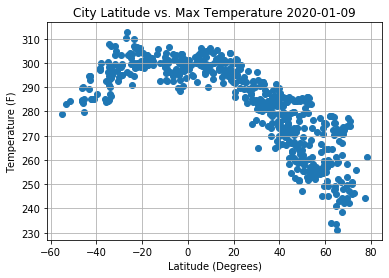

In [7]:
# Build a scatter plot for latitude vs temperature
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date_today}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

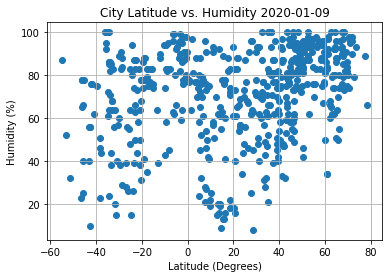

In [8]:
# Build a scatter plot for latitude vs humidity
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {date_today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

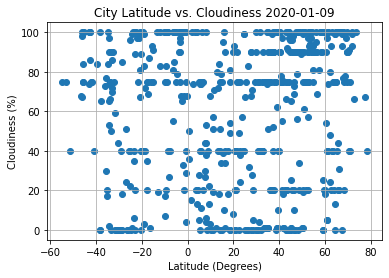

In [9]:
# Build a scatter plot for latitude vs cloudiness
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {date_today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

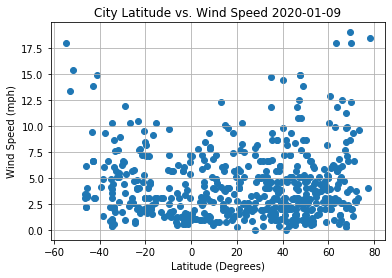

In [10]:
# Build a scatter plot for latitude vs wind speed
plt.scatter(weather_data["latitude"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {date_today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

### Observable Trends
- Temperatures are highest at the equator (0 degrees) and decrease as we go towards the poles (+90/-90 degrees).
- Wind speeds are highest nearer to the poles (+90/-90 degrees) and decrease as we go towards the equator (0 degrees).
- There is no obvious relation between latitude and humidity or between latitude and cloudiness, indicating that other factors (like proximity to water bodies) might play a more significant role in these relationships.